# Exercise 5

Authors:

Tuoxing Liu \
Sima Esmaeili \
Shruti Ghargi

<div style="color: green; font-weight:bold">Task 2 </br>
In our proof, we used V(X) = E(X^2) - E(X)^2. I notice that the solution didn't use this conclusion. I think it's still true even if the data are not samples from a random variable, since we only need the definition of variance V(X) to prove that.
</div>

# 3.1 Implement Orthogonal Matching Pursuit 
# 3.2 Classification with sparse LDA

Minimum number of pixels for an error rate <= 0.1: 2


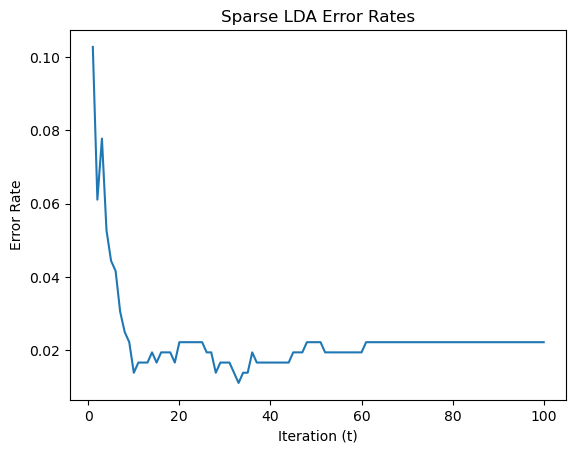

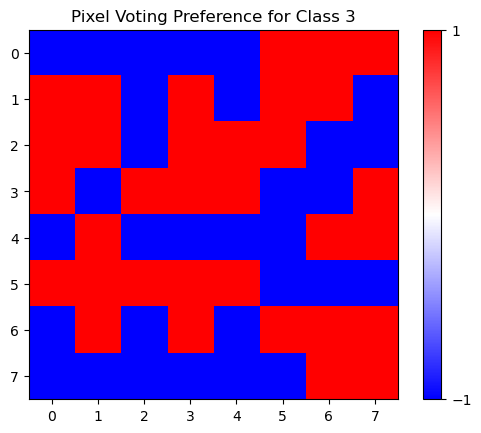

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Step 1: Load and preprocess the dataset
digits = load_digits()
X = digits.images.reshape(len(digits.images), -1)
y = np.where(digits.target == 3, 1, -1)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 2: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Step 3: Perform sparse LDA using OMP
T = 100  

# Apply OMP regression
N, D = X_train.shape
A = set()
B = set(range(D))
solutions = np.zeros((D, T))

r = y_train
for t in range(T):
    max_corr = -np.inf
    best_col = None

    for j in B:
        corr = np.abs(X_train[:, j].T @ r)
        if corr > max_corr:
            max_corr = corr
            best_col = j

    if best_col in B:
        A.add(best_col)
        B.remove(best_col)

    X_active = X_train[:, list(A)]
    beta_t = np.linalg.lstsq(X_active, y_train, rcond=None)[0]
    solutions[list(A), t] = beta_t

    r = y_train - X_active @ beta_t

# Step 4: Analyze the results
error_rates = []
selected_pixels = []
voting_preference = np.zeros((D, T), dtype=int)  
for t in range(T):
    selected_features = np.nonzero(solutions[:, t])[0]
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Fit LDA model and make predictions
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train_selected, y_train)
    y_pred = lda.predict(X_test_selected)

    # Calculate the classification error rate
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)
    selected_pixels.append(len(selected_features))

    # Calculate the pixel voting preference for class '3'
    beta = solutions[selected_features, t]
    pixel_voting_preference = np.sign(beta)
    voting_preference[selected_features, t] = pixel_voting_preference

# Finding the number of pixels for acceptable error rates
acceptable_error_rate = 0.1  # acceptable error rate threshold
acceptable_pixels = [p for p, error in zip(selected_pixels, error_rates) if error <= acceptable_error_rate]
if acceptable_pixels:
    min_acceptable_pixels = min(acceptable_pixels)
    print(f"Minimum number of pixels for an error rate <= {acceptable_error_rate}: {min_acceptable_pixels}")
else:
    print("No acceptable error rates found.")

# Visualization: Error rates for each iteration
plt.plot(range(1, T+1), error_rates)
plt.xlabel('Iteration (t)')
plt.ylabel('Error Rate')
plt.title('Sparse LDA Error Rates')
plt.show()

# Visualization: Pixel order and voting preference
pixel_order = np.argsort(np.abs(solutions.sum(axis=1)))  # Order of pixels switched to active


image_data = np.zeros((8, 8))
for i, pixel_index in enumerate(pixel_order):
    row = i // 8
    col = i % 8
    image_data[row, col] = voting_preference[pixel_index, -1]  # Use the last iteration's voting preference

# Show the image with 1 and -1 as colors
plt.imshow(image_data, cmap='bwr', interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar(ticks=[-1, 1])
plt.title('Pixel Voting Preference for Class 3')
plt.show()

Regarding standardization, it is beneficial to standardize the data before training and testing for many machine learning algorithms, including LDA. Standardization helps bring features to a similar scale, which can prevent some features from dominating others during the learning process. It can improve the stability and performance of the model. In the provided code, the data is standardized using StandardScaler before splitting it into training and test sets.